## **Load The Helpful Packages**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

from nltk.tokenize import word_tokenize
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## **Load DataSet**

In [ ]:
df = pd.read_csv('BBC News Train.csv')
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


## **EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [ ]:
df.isna().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [ ]:
df['Text'][:10]

0    worldcom ex-boss launches defence lawyers defe...
1    german business confidence slides german busin...
2    bbc poll indicates economic gloom citizens in ...
3    lifestyle  governs mobile choice  faster  bett...
4    enron bosses in $168m payout eighteen former e...
5    howard  truanted to play snooker  conservative...
6    wales silent on grand slam talk rhys williams ...
7    french honour for director parker british film...
8    car giant hit by mercedes slump a slump in pro...
9    fockers fuel festive film chart comedy meet th...
Name: Text, dtype: object

In [ ]:
df['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [ ]:
df.groupby('Category').Text.count()

Category
business         336
entertainment    273
politics         274
sport            346
tech             261
Name: Text, dtype: int64

## **Data Visualization**

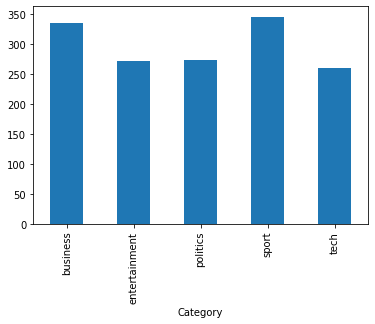

In [ ]:
df.groupby('Category').Text.count().plot.bar()

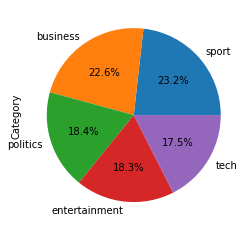

In [ ]:
df['Category'].value_counts().plot.pie(autopct="%1.1f%%")

In [ ]:
from wordcloud import WordCloud

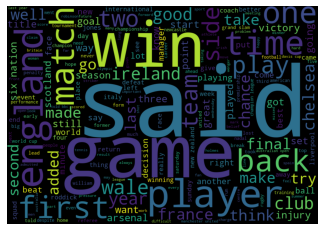

In [ ]:
wc = WordCloud(width=1000,height=700,
               background_color='black',
               min_font_size=10)
wc.generate(" ".join(df[df['Category']=='sport']['Text']))
plt.imshow(wc)
plt.axis('off')
plt.show()

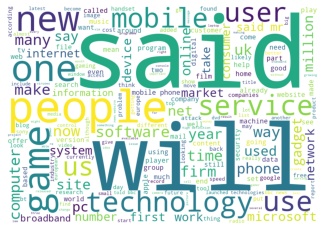

In [ ]:
wc = WordCloud(width=1000,height=700,
               background_color='white',
               min_font_size=10)
wc.generate(" ".join(df[df['Category']=='tech']['Text']))
plt.imshow(wc)
plt.axis('off')
plt.show()

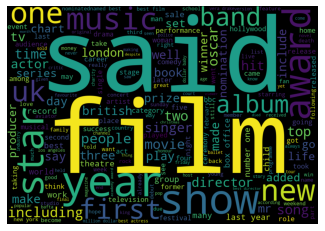

In [ ]:
wc = WordCloud(width=1000,height=700,
               background_color='black',
               min_font_size=10)
wc.generate(" ".join(df[df['Category']=='entertainment']['Text']))
plt.imshow(wc)
plt.axis('off')
plt.show()

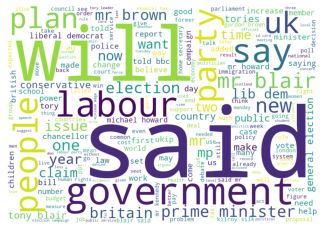

In [ ]:
wc = WordCloud(width=1000,height=700,
               background_color='white',
               min_font_size=10)
wc.generate(" ".join(df[df['Category']=='politics']['Text']))
plt.imshow(wc)
plt.axis('off')
plt.show()

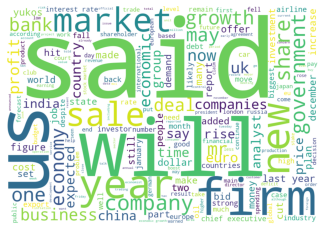

In [ ]:
wc = WordCloud(width=1000,height=700,
               background_color='white',
               min_font_size=10)
wc.generate(" ".join(df[df['Category']=='business']['Text']))
plt.imshow(wc)
plt.axis('off')
plt.show()

## **Data Preprocessing**

In [ ]:
def cleantext(text):
  #step1 -: lower and tokenization
  tokens = word_tokenize(text.lower())

  #step2 -: filtering all the alphabets/ removing the punctuation
  ftoken = [t for t in tokens if(t.isalpha())]

  #step3 -: stopwords removal
  stopword = stopwords.words('english')
  ctoken = [t for t in ftoken if(t not in stopword)]

  #step4 -: lemmatization
  lemma = WordNetLemmatizer()
  ltoken = [lemma.lemmatize(t) for t in ctoken]

  #step5 -: joining
  return " ".join(ltoken)

In [ ]:
df['Text'] = df['Text'].apply(cleantext)

In [ ]:
df['Text']

0       worldcom launch defence lawyer defending forme...
1       german business confidence slide german busine...
2       bbc poll indicates economic gloom citizen majo...
3       lifestyle governs mobile choice faster better ...
4       enron boss payout eighteen former enron direct...
                              ...                        
1485    double eviction big brother model caprice holb...
1486    dj double act revamp chart show dj duo jk joel...
1487    weak dollar hit reuters revenue medium group r...
1488    apple ipod family expands market apple expande...
1489    santy worm make unwelcome visit thousand websi...
Name: Text, Length: 1490, dtype: object

## **Model Creation**

In [ ]:
x = df['Text']
y = df['Category']

In [ ]:
a=y

In [ ]:
#Encoding
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
x = cv.fit_transform(x)

In [ ]:
#split data into train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
print('x_train shape:', xtrain.shape)
print('x_test shape:', xtest.shape)
print('y_train shape:', ytrain.shape)
print('y_test shape:', ytest.shape)

x_train shape: (1043, 20455)
x_test shape: (447, 20455)
y_train shape: (1043,)
y_test shape: (447,)


In [ ]:
def mymodel(model):
  model.fit(xtrain,ytrain)
  ypred=model.predict(xtest)
  print(classification_report(ytest,ypred))

In [ ]:
#Random Forest
rf = RandomForestClassifier()

#AdaBoostClassifier
ada = AdaBoostClassifier()

#GredientBoostClassifier
gd = GradientBoostingClassifier()

#xgboost classifier
xg = XGBClassifier()

In [ ]:
mymodel(rf)

               precision    recall  f1-score   support

     business       0.97      0.97      0.97        97
entertainment       0.98      0.98      0.98        81
     politics       0.96      0.99      0.98        83
        sport       0.98      1.00      0.99       100
         tech       0.98      0.93      0.95        86

     accuracy                           0.97       447
    macro avg       0.97      0.97      0.97       447
 weighted avg       0.97      0.97      0.97       447



In [ ]:
mymodel(ada)

               precision    recall  f1-score   support

     business       0.61      0.71      0.65        97
entertainment       0.88      0.52      0.65        81
     politics       0.68      0.75      0.71        83
        sport       0.71      0.89      0.79       100
         tech       0.96      0.76      0.84        86

     accuracy                           0.73       447
    macro avg       0.76      0.72      0.73       447
 weighted avg       0.76      0.73      0.73       447



In [ ]:
mymodel(gd)

               precision    recall  f1-score   support

     business       0.91      0.96      0.93        97
entertainment       0.97      0.94      0.96        81
     politics       0.96      0.95      0.96        83
        sport       0.96      0.98      0.97       100
         tech       0.96      0.93      0.95        86

     accuracy                           0.95       447
    macro avg       0.95      0.95      0.95       447
 weighted avg       0.95      0.95      0.95       447



In [ ]:
mymodel(xg)

               precision    recall  f1-score   support

     business       0.95      0.95      0.95        97
entertainment       0.97      0.90      0.94        81
     politics       0.94      0.95      0.95        83
        sport       0.92      0.98      0.95       100
         tech       0.96      0.94      0.95        86

     accuracy                           0.95       447
    macro avg       0.95      0.94      0.95       447
 weighted avg       0.95      0.95      0.95       447



**Model Checking**

In [ ]:
#Input
news = [input('News Text:  ')]

#Transformation and Prediction of news
title_vec = cv.transform(news).toarray()
prediction = rf.predict(title_vec)

print("News Category: ",prediction)

News Text:  software watching while you work software that can not only monitor every keystroke and action performed at a pc but also be used as legally binding evidence of wrong-doing has been unveiled.  worries about cyber-crime and sabotage have prompted many employers to consider monitoring employees. the developers behind the system claim it is a break-through in the way data is monitored and stored. but privacy advocates are concerned by the invasive nature of such software.  the system is a joint venture between security firm 3ami and storage specialists bridgehead software. they have joined forces to create a system which can monitor computer activity  store it and retrieve disputed files within minutes. more and more firms are finding themselves in deep water as a result of data misuse. sabotage and data theft are most commonly committed from within an organisation according to the national hi-tech crime unit (nhtcu) a survey conducted on its behalf by nop found evidence that 